# **Fibonacci Function using Dynamic Programming - Perfomance Evaluation**

Happened to watch the dynamic programming lecture from MIT OCW in YouTube, last day.
In that the professor explained 3 different approaches of calculating fibonacci number.


1.   The traditional recursive way
2.   Dynamic programming approach using recursion
3.   Dynamic programming approach using loop

Lets look in to those ways and their complexities.



I implemented the functions in CPP.

The following are the implementation of all the 3 approaches.

### **1. Traditional Recursive Approach**

  In this approach, we set the fibonacci number corresponding to 1 ad 2 as 1 itself, using the ```if``` statement and for all the other numbers, we simply use the logic, ```fibonacci(n) = fibonacci(n-1) + fibonacci(n-2)```
  ```
  int fib(int n){
      int f;
      if( n==1 || n==2 ){
        f = 1;
      }else{
        f = fib(n-1) + fib(n-2);
      }
      return f;
  }
  ```
### **2. Dynamic Programming Approach using Recursion**

  In this approach, we use a HashMap which stores the fibonacci value of a number after calculating it. So whenever we need to get that value again, we just need to get the stored value. It saves us lots of repeated computations.
  ```
  int fib(int n){
      int f;
      if( n==1 || n==2 ){
        f = 1;
      }else{
        f = mem[n-1] + mem[n-2];
      }
      mem[n] = f;
      return f;
  }
```

### **3. Dynamic Programming Approach using Loop**
  
  In this approach, we calculate all the fibonacci numbers from 1 to n, (the number we need) and store it. So whenever we need the ```fibonacci(n)``` we just need to fetch the stored values of ```fibonacci(n-1)``` and ```fibonacci(n-2)``` and return their sum.
  ```
  int fib(int n){
      mem[1] = 1;
      mem[2] = 1;
      for(int i=3; i<=n; i++){
        mem[i] = mem[i-1] + mem[i-2];
      }
      return mem[n];
  }
  ```

### **Importing all the necessary modules**
Matplotlib is a popular python library for plotting graphs. In this example we will be comparing the efficiency and time complexity of all those 3 approaches using graphs. We are handling JSON data (JavaScript Object Notation) created using the output of the functions. For handling that, we use the json module in python.

In [0]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

In [12]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Loading the JSON data from my Google Drive**
I have stored all the JSON files in my Google Drive folder. For accessing that, first we need to mount the Drive folder here, which we did in the previous line. Now we need to open the JSON file and fetch the data.

In [0]:
data_approach1 = data_approach2 = data_approach3 = None
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output1.json', 'r') as f:
  data_approach1 = json.load(f)
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output2.json', 'r') as f:
  data_approach2 = json.load(f)
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output3.json', 'r') as f:
  data_approach3 = json.load(f)

### **Preprocessing the data to be shown in graph**
In the graph we are going to plot, we need data for both X-axis and Y-axis. In the X- axis we represent the numbers (1,2,3,4,...) and in Y-axis we represent the time taken to calculate their corresponding fibonacci value.

Here ```numbers``` is a dictionary which contains the numbers from all those 3 different approaches. It will be of the form: 

```
numbers = {
  'approach1' : [1,2,3,....],
  'approach2' : [1,2,3,....],
  'approach3' : [1,2,3,....]
}
```
Instead of using the same set of numbers, we have used different set of numbers for each data we have, because in each approaches the function starts misbehaving in a different number. We will see that when the graph is plotted.

Similarly the ```time_taken``` is also a dictionary, and it contains the time taken to calculate the fibonacci value, from all those 3 different approaches. It will be of the form:
```
time_taken = {
  'approach1' : [....],
  'approach2' : [....],
  'approach3' : [....]
}
```

In [0]:
numbers = {}
time_taken = {}
numbers['approach1'] = [ row['num'] for row in data_approach1['data'] ]
time_taken['approach1'] = [ row['time'] for row in data_approach1['data'] ]

numbers['approach2'] = [ row['num'] for row in data_approach2['data'] ]
time_taken['approach2'] = [ row['time'] for row in data_approach2['data'] ]

numbers['approach3'] = [ row['num'] for row in data_approach3['data'] ]
time_taken['approach3'] = [ row['time'] for row in data_approach3['data'] ]

### **Plot the Graph**

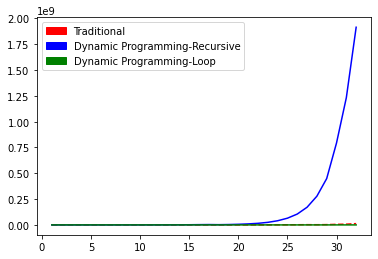

In [21]:
plt.plot(
         numbers['approach1'],
         time_taken['approach1'],
         'r--',
         numbers['approach2'],
         time_taken['approach2'],
         'b',
         numbers['approach3'],
         time_taken['approach3'],
         'g',
         label='Performance Evaluation'
         )
red_patch = mpatches.Patch(color='red', label='Traditional')
blue_patch = mpatches.Patch(color='blue', label='Dynamic Programming-Recursive')
green_patch = mpatches.Patch(color='green', label='Dynamic Programming-Loop')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

### **Primary Evaluation**
In the graph above, blue represents the dynamic programming approach using recursion and it takes exponential time on smaller values itself.

So lets avoid that approach, and find the winner among the other two.
From the above plot, both approaches give similar results, but lets run another check, with a higher set of numbers.

### **Obtaining Bigger Input Sets**
In the last testing, we called the function for numbers from 1 to 32. Now we use a slightly bigger input set, which is from 1 to 50.

In [0]:
data1 = data3 = None
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output1_big.json', 'r') as f:
  data1 = json.load(f)
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output3_big.json', 'r') as f:
  data3 = json.load(f)

In [0]:
numbers = {}
time_taken = {}
numbers['approach1'] = [ row['num'] for row in data1['data'] ]
time_taken['approach1'] = [ row['time'] for row in data1['data'] ]

numbers['approach3'] = [ row['num'] for row in data3['data'] ]
time_taken['approach3'] = [ row['time'] for row in data3['data'] ]

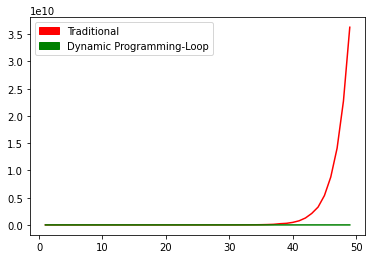

In [24]:
plt.plot(
         numbers['approach1'],
         time_taken['approach1'],
         'r',
         numbers['approach3'],
         time_taken['approach3'],
         'g',
         label='Performance Evaluation'
         )
red_patch = mpatches.Patch(color='red', label='Traditional')
green_patch = mpatches.Patch(color='green', label='Dynamic Programming-Loop')
plt.legend(handles=[red_patch, green_patch])
plt.show()

### **Final Evaluation**
It is clear from the plot, that when it comes to bigger numbers, the traditional recursive approach takes too much time to compute whereas the dynamic programming-loop approach takes an almost constant time.

### **Further Evaluation**
Now lets see what happens to the winner, when it comes to bigger inputs.

In [0]:
data = None
with open('/content/gdrive/My Drive/Colab Notebooks/fibonacci_perf_eval/output3_bigger.json', 'r') as f:
  data = json.load(f)

In [0]:
numbers = [ row['num'] for row in data['data'] ]
time_taken = [ row['time'] for row in data['data'] ]

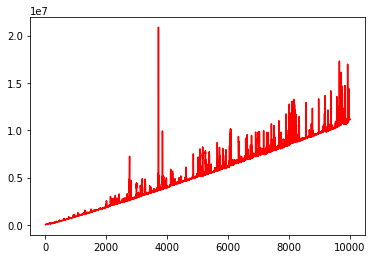

In [27]:
plt.plot(
         numbers,
         time_taken,
         'r',
         label='Performance Evaluation'
         )
plt.show()

For bigger inputs also, this approach takes an almost linear time. This function has a time complexity of O(n) where n is the input number